In [1]:
import scipy.stats as sts
import pandas as pd
from scipy.stats import semicircular as sc
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Проведем исследование центральной предельной теоремы для выборки, распределенной по <a href='https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BB%D1%83%D0%BA%D1%80%D1%83%D0%B3%D0%BE%D0%B2%D0%BE%D0%B9_%D0%B7%D0%B0%D0%BA%D0%BE%D0%BD_%D0%92%D0%B8%D0%B3%D0%BD%D0%B5%D1%80%D0%B0'> полукруговому закону   Вигнера</a> с параметром $R$.

<p>Плотность вероятности случайной величины, распределенной по этому закону, представляет из себя 
$ f(x) = \frac{2}{(\pi R^2)} * \sqrt{(R^2-x^2)}$, если $x\in[-R, R]$ и $f(x)=0$ иначе. <p>

Математическое ожидание и дисперсия следующие: $E(X) = 0$, $D(X) = \frac{R^2}{4}$

In [2]:
# параметр непрерывного распределения Вигнера R
R = 3

# значения дисперсии, среднего и стандартного отклонения случайной величины
mean = 0
variance = R**2 / 4
std = np.sqrt(variance)

Введем случайную величину, распределенную по закону Вигнера 
с параметром R=3 и сгенерируем из распределения выборку объема 1000

In [26]:
# задаем случайную величину, распределенную по закону Вигнера
sc_rv = sc(scale=R)

# генерируем выборку размера 1000 из нашего распределения
sample = sc_rv.rvs(size=1000)

Математическое ожидания и дисперсия нашей случайной величины следующие:

In [4]:
print("E(X)=", int(sc_rv.stats()[0]))
print("D(X)=", float(sc_rv.stats()[1]))

E(X)= 0
D(X)= 2.25


Построим гистограмму нашей выборки, нарисуем поверх нее теоретическую плотность распределения нашей случайной величины и плотность нормального распределения

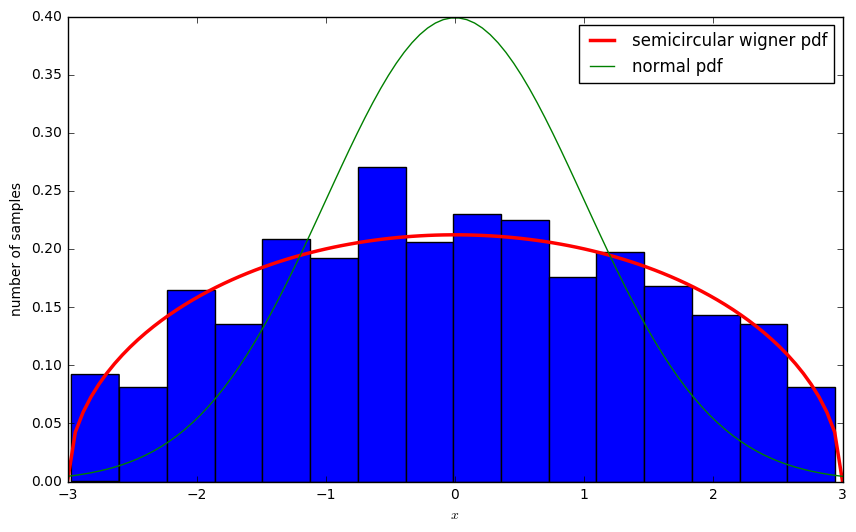

In [5]:
x = np.linspace(-3, 3, 100)

# теоретическая плотность распределения нашей случайной величины 
sc_pdf = (2 / (np.pi * R**2)) * np.sqrt(R**2 - x**2)

# строим гистограммы выборки, теоретическую плотность распределения и
# плотность нормально распределения
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=16, normed=True)
plt.plot(x, sc_pdf, 'r-', lw=2.5, label='semicircular wigner pdf')
plt.plot(x, sts.norm().pdf(x), 'g-', lw=1, label='normal pdf')
plt.legend(loc='best')
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.show()

<p>Для различных n сгенерируем 1000 выборок объема n, нарисуем гистограммы распределений выборочных средних этих выборок
и сравним с плотностью соответствующего нормального распределения.</p>

<p>Оценим плотность распределения при помощи ядерного сглаживания и сравним её с плотностью нормального распределения.</p>

Значение n:  10


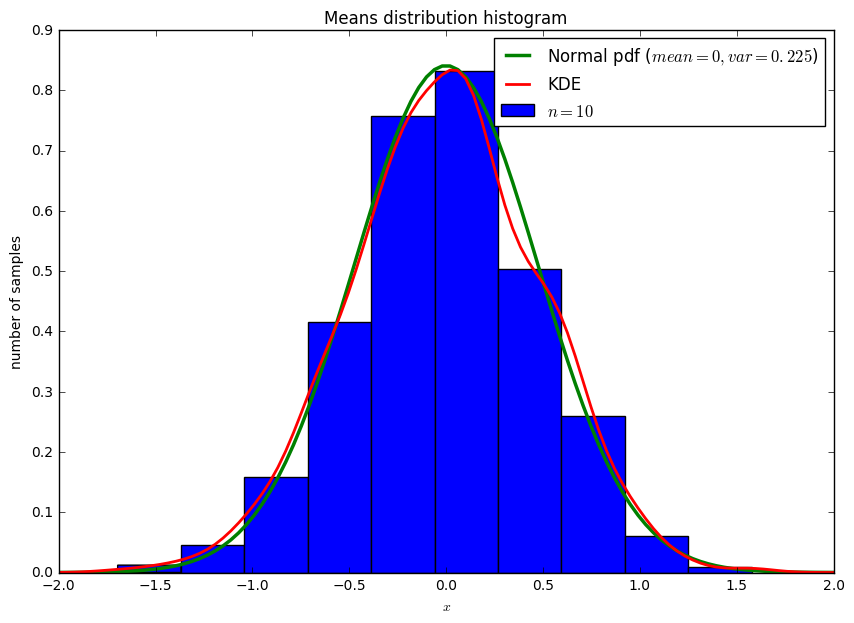

Значение n:  50


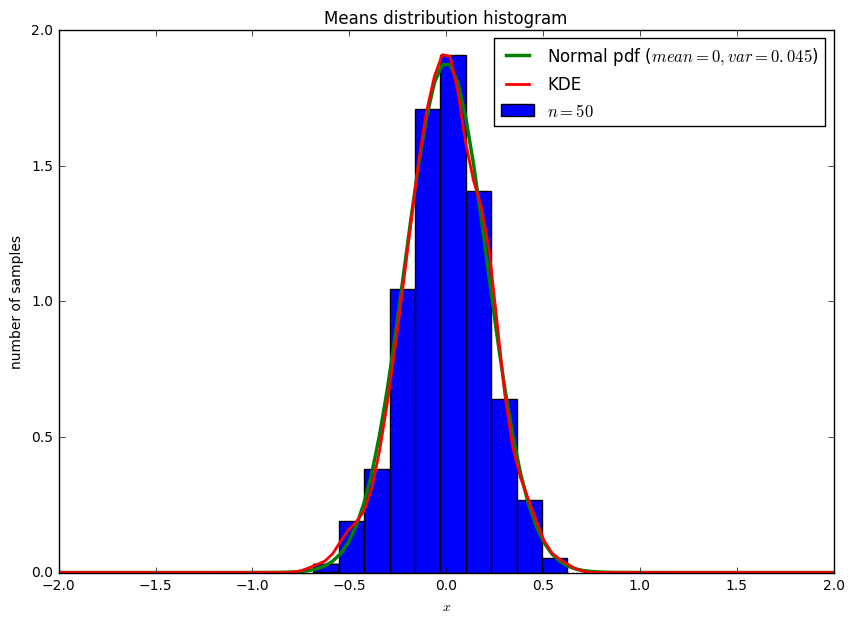

Значение n:  100


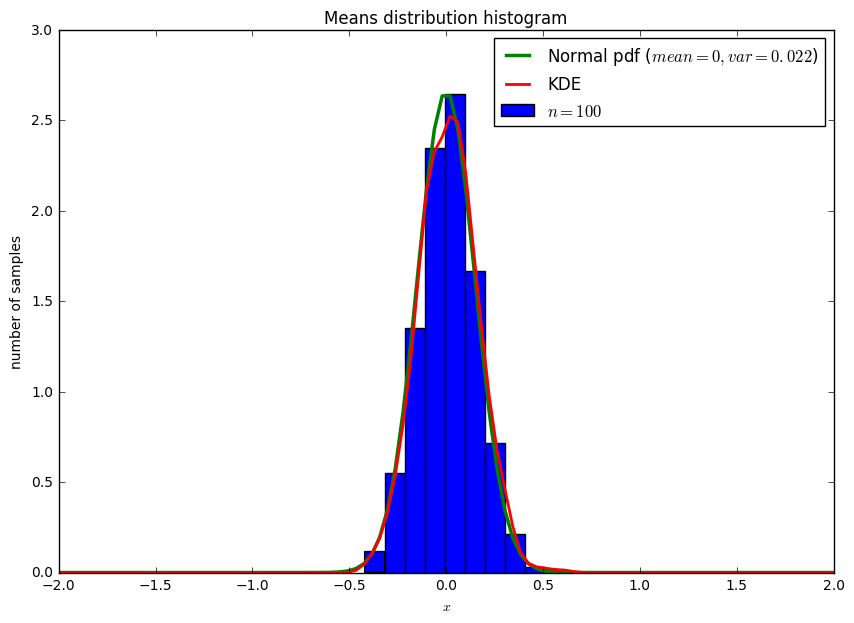

Значение n:  150


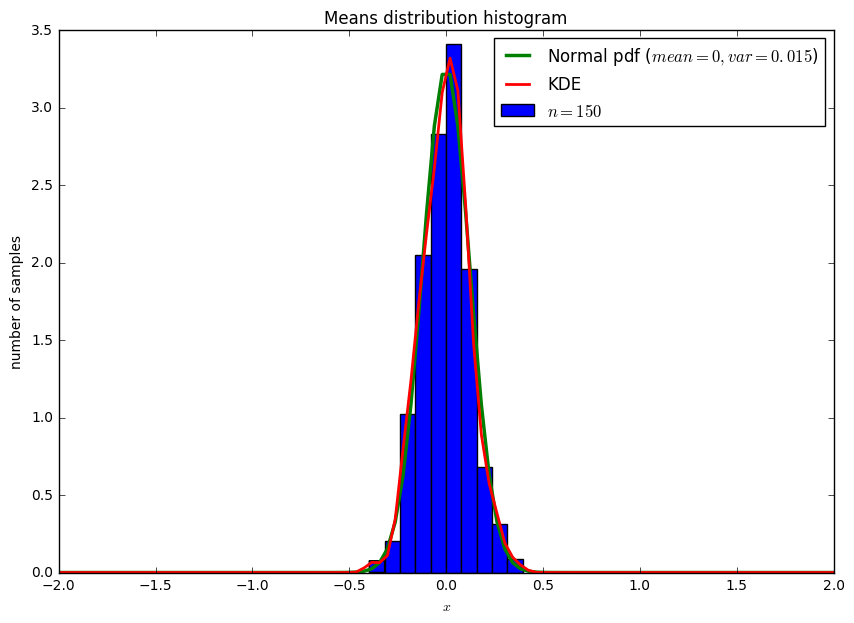

In [25]:
for n in [10, 50, 100, 150]:
    print('Значение n: ', n)  
    # значение среднего нормально распределенной случайной величины
    normal_mean = mean
    
    # значение дисперсии нормально распределенной случайной величины
    normal_variance = variance / n
    
    # значение стандартного отклонения нормально распределенной случайной величины
    normal_std = np.sqrt(normal_variance)
    
    # задаем случайную величину, распределенную по нормальному закону
    norm_rv = sts.norm(loc=normal_mean, scale=normal_std)
    
    mean_values = []
    
    # генерируем 1000 выборок размера n
    for i in range(1, 1001):
        mean_values.append(np.mean(sc_rv.rvs(size=n)))
    
    x = np.linspace(-2, 2, 100)
    
    # ядерная оценка плотности распределения выборочных средних
    kde = gaussian_kde(mean_values)
    
    # строим гистограммы распределений выборочных средних, плотность соответсвующего нормального распределения
    # и график оценки плотности распределения выборочных средних при помощи ядерного сглаживания
    plt.figure(figsize=(10, 7))
    plt.hist(mean_values, normed=True, label='$n=%s$' % n)
    plt.plot(x, norm_rv.pdf(x), lw=2.5, label='Normal pdf ($mean=%s, var=%s$)'% (normal_mean, round(normal_variance, 3)))
    plt.plot(x, kde(x), label='KDE', lw=2)
    plt.legend(loc='best')
    plt.title('Means distribution histogram')
    plt.ylabel('number of samples')
    plt.xlabel('$x$')
    plt.show()            

Все полученные распределения приближаются к нормальным в соответствии с ЦПТ. <p>Разница между ними состоит в том, что с увеличением значения $n$ разброс значений средних уменьшается, а точность аппроксимации только увеличивается.</p>

__Выводы__:
* Как мы видим, центральная предельная теорема действительно работает. Даже при маленьком размере выборки $n=10$ наше распределение уже достаточно хорошо приближено к нормальному. 
* Дальнейшее увеличение объема выборки только еще более приближает распределение к нормальному. Это означает, что точность аппроксимации только __увеличивается__.
* С ростом $n$ разброс значений средних в распределении только уменьшается.